The file is not a zip file!
Data loaded successfully!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-n

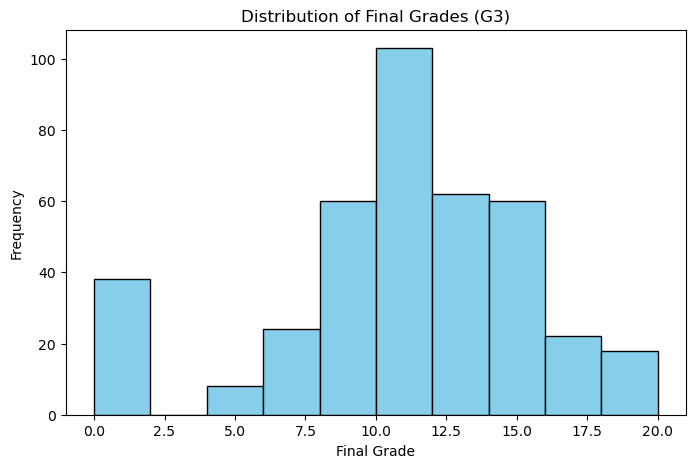

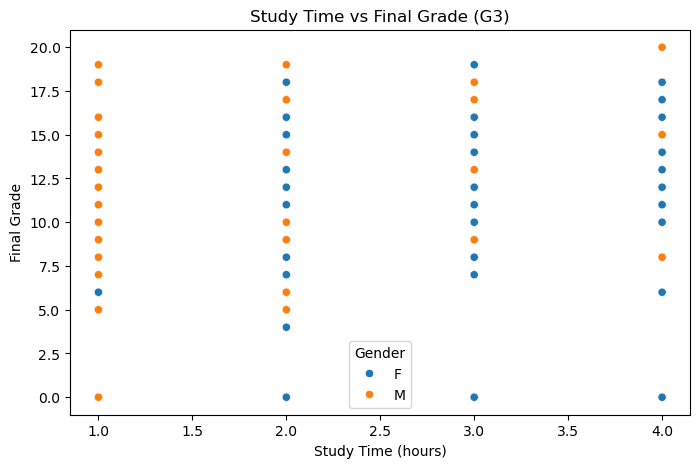

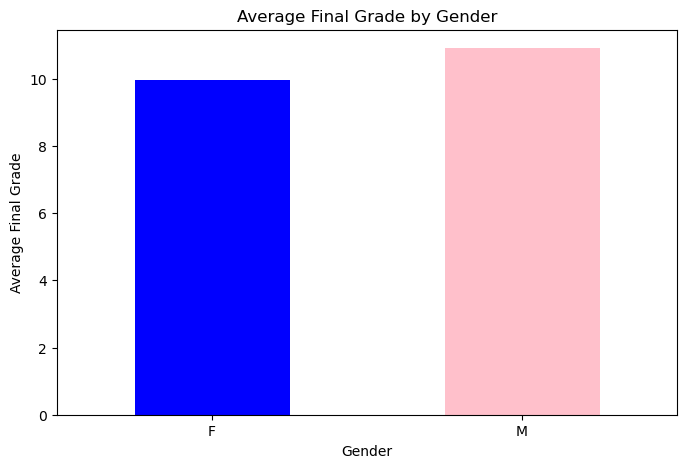

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import urllib.request
import zipfile

# Step 1: Define the URL and Download the Dataset
url = "http://localhost:8888/lab/tree/student.zip"  # Make sure this URL is correct

# Download the ZIP file (Make sure the file is a valid zip file)
urllib.request.urlretrieve(url, "student.zip")

# Check if the downloaded file is a valid zip file before extracting
with open("student.zip", "rb") as file:
    signature = file.read(4)  # Check the first 4 bytes of the file
    if signature == b'PK\x03\x04':  # ZIP file signature
        with zipfile.ZipFile("student.zip", "r") as zip_ref:
            zip_ref.extractall(".")
    else:
        print("The file is not a zip file!")

# Step 2: Load the Dataset (make sure the file name is correct)
try:
    data = pd.read_csv("student-mat.csv", sep=";")  # Ensure correct CSV name and separator
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

# Step 3: Data Exploration
print("\nDataset Info:")
print(data.info())  # Display general info about the dataset

print("\nMissing Values:")
print(data.isnull().sum())  # Check for missing values

# Step 4: Data Cleaning
# Remove duplicates if any
data = data.drop_duplicates()

# Step 5: Data Analysis
# Average score in math (G3)
average_score = data['G3'].mean()
print(f"\nAverage Math Score (G3): {average_score:.2f}")

# Number of students who scored above 15 in their final grade (G3)
students_above_15 = len(data[data['G3'] > 15])
print(f"Number of students scoring above 15: {students_above_15}")

# Correlation between study time and final grade (G3)
correlation = data['studytime'].corr(data['G3'])
print(f"Correlation between study time and final grade: {correlation:.2f}")

# Average final grade by gender
average_grade_by_gender = data.groupby('sex')['G3'].mean()
print("\nAverage Final Grade by Gender:")
print(average_grade_by_gender)

# Step 6: Data Visualization
# Histogram of final grades (G3)
plt.figure(figsize=(8, 5))
plt.hist(data['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of study time vs. final grade (G3)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='studytime', y='G3', hue='sex')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade")
plt.legend(title="Gender")
plt.show()

# Bar plot of average final grade by gender
plt.figure(figsize=(8, 5))
average_grade_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("Average Final Grade by Gender")
plt.ylabel("Average Final Grade")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()
